In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
WORKDIR = os.path.join(os.getcwd(), 'names')

In [20]:
def read_data(year):
    with open('{}/yob{}.txt'.format(WORKDIR, year)) as f:
        return pd.read_csv(f, names = ['Name', 'Gender', 'Count'])


def read_data_for_range(first_year, last_year, step=10):
    names_by_year = {}
    for year in range(first_year, last_year+1, step):
        names_by_year[year] = read_data(year)
    return pd.concat(names_by_year, names = ['Year', 'Pos'])


def group_by_name(df):
    return df.groupby([df.index.get_level_values(0), 'Name']).sum()


def filter_by_name(df, names):
    return group_by_name(df).query('Name == {}'.format(names)).unstack('Name')

In [21]:
def get_ruth_robert_graph():
    df = read_data_for_range(1900, 2000)
    ruth_robert_dynamics = filter_by_name(df, ["Ruth", "Robert"])
    return ruth_robert_dynamics.plot()

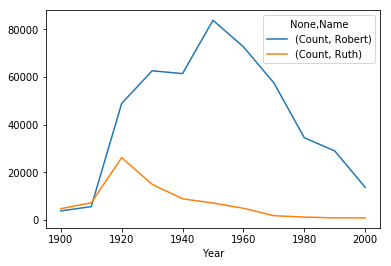

In [22]:
get_ruth_robert_graph()

In [25]:
def get_ruth_robert_bar():
    return get_ruth_robert_data().plot.bar()


def get_ruth_robert_data():
    df = read_data_for_range(1900, 2000, 5)
    return filter_by_name(df, ["Ruth", "Robert"])

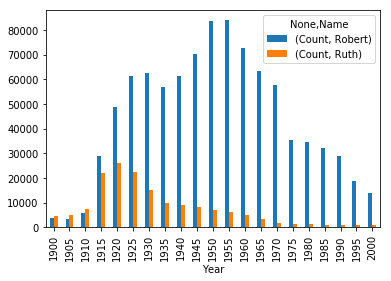

In [26]:
get_ruth_robert_bar()

In [27]:
def get_top_10_names_pie():
    df = get_top_10_names()
    return df.plot(kind='pie', y = 'Count', labels=df['Name'], legend = False)


def get_top_10_names():
    df = read_data(1950)
    r_names = df[(df.Name.str.startswith('R'))]
    return r_names.sort_values(by='Count', ascending=False).head(10)

In [28]:
get_top_10_names()

,Name,Gender,Count
6112,Robert,M,83565
6117,Richard,M,51001
6122,Ronald,M,29916
6137,Roger,M,12548
6141,Raymond,M,11179
35,Rebecca,F,9427
48,Ruth,F,7128
6161,Roy,M,6456
55,Rita,F,6424
6162,Ralph,M,6404


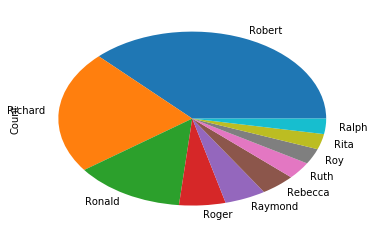

In [29]:
get_top_10_names_pie()

In [30]:
def get_consonants_scatter():
    return get_consonants_count().plot.scatter(x='Consonants', y='Count')


def get_consonants_count():
    df = read_data_for_range(1900, 2000, 1).reset_index()
    df = df.groupby('Name').sum().reset_index()
    df['Consonants'] = df.apply(lambda row: count_consonants(row.Name), axis=1)
    return df


def count_consonants(text):
    consonants = "bcdfghjklmnpqrstvwxyz"
    count = 0
    for x in text.lower():
        if x in consonants:
            count += 1
    return count

In [32]:
get_consonants_count().head(10)

,Name,Year,Pos,Count,Consonants
0,Aadam,19947,238374,58,2
1,Aadarsh,2000,27997,5,4
2,Aadil,17956,199725,80,2
3,Aaditya,7994,97631,30,3
4,Aage,1915,8048,7,1
5,Aagot,1915,4273,5,2
6,Aahil,2000,26757,6,2
7,Aailiyah,1995,13381,5,3
8,Aailyah,9984,55831,36,3
9,Aaisha,21906,108811,83,2


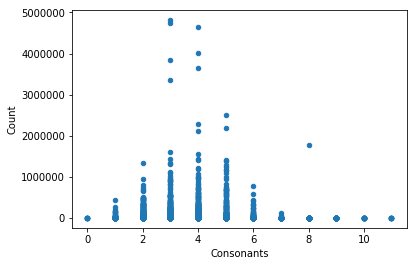

In [33]:
get_consonants_scatter()